# Dealing with Missing Data. 

- Categorize every column with missing values as MAR, MNAR, and MCAR.
- For every category, outline the reasons. 
- The dataset doesn’t have a data description. You are expected to use your initiatives.

In [1]:
#importing the pandas module for data manipulation
import pandas as pd

In [2]:
#Reading the csv file into a pandas dataframe- house_prices
house_prices = pd.read_csv('house_prices.csv')
house_prices

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
#checking the dataframe programatically
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


The columns - location, size, society, bath, balcony have missing data

In [4]:
print(house_prices.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


The columns- The columns - location, size, society, bath, balcony have 1, 16, 5502, 73, 609 missing observations respectively.

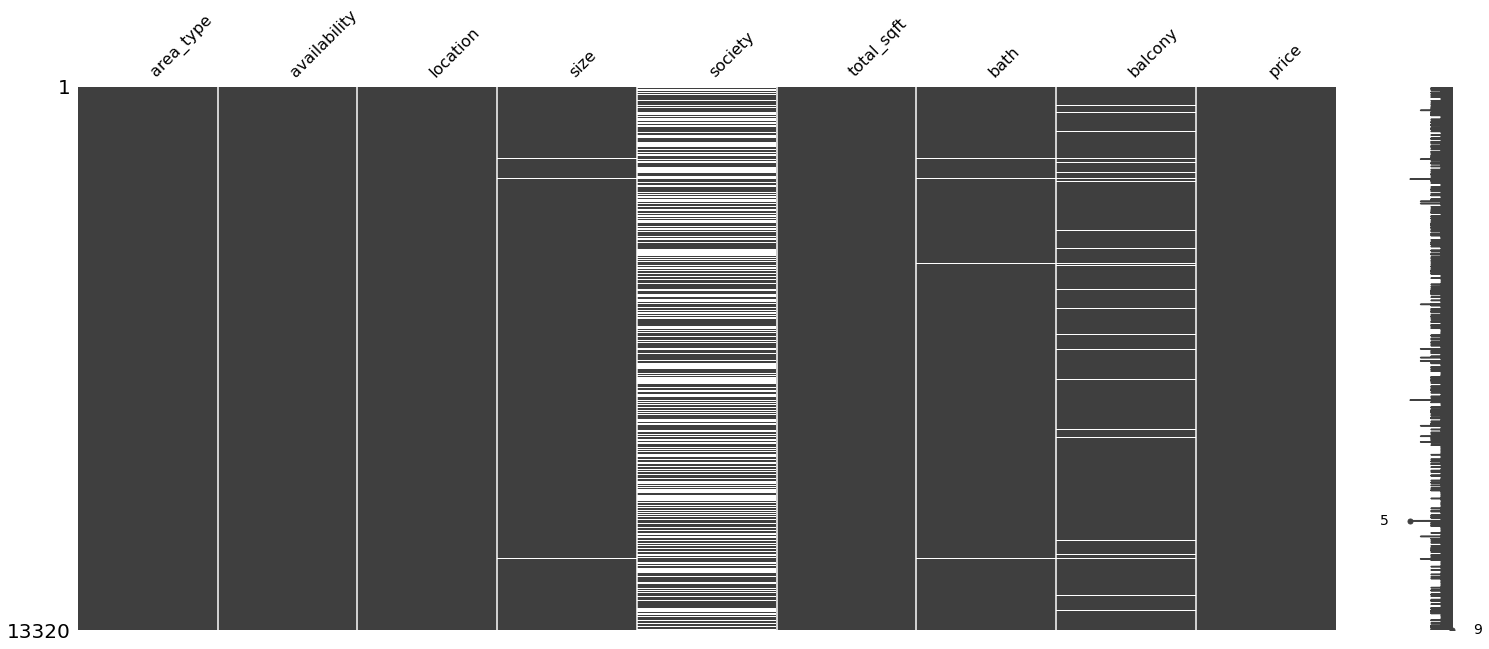

In [5]:
# importing the missingno module
import missingno as msno

# importing the matplotlib module
import matplotlib.pyplot as plt

# a matrix plot of the missing values
msno.matrix(house_prices)
plt.show()

This plot shows missing observations in the various variables with missing data. It looks like there might be a correlation between the variable size missing data and the variable bath missing data. - Suspecting  missingness not at random.

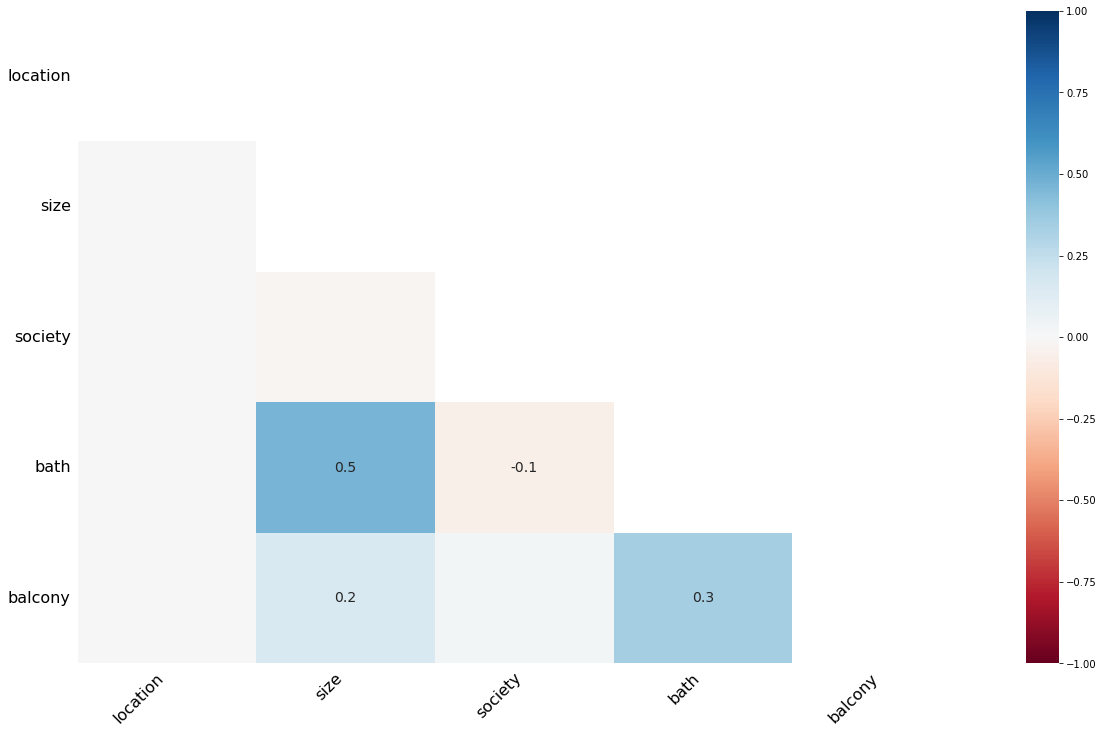

In [6]:
# a heatmap plot of the missing values to show the strength of the correlation
msno.heatmap(house_prices)
plt.show()

From the heatmap, there is a somewhat strong correlation between the missing observations in the bath variable and those in the size variable. Also in balcony and bath missingness. Therefore, we can not say the missingness in these variables is completely at random. To rule out MCAR in the numeric variables balcony and bath, lets carry out the litte MCAR test

In [7]:
# this test is a chi-square test comparing means and covariances of variables across different missing-data patterns. 
#if the pvalue gotten after the test is less than 0.05, then we reject the null hypothesis that the missingness is completely at random

import numpy as np
from scipy.stats import chi2

# Step 1: Select numeric columns only
df_numeric = house_prices.select_dtypes(include=[np.number])

# Step 2: Create missingness pattern
pattern = df_numeric.isnull().astype(int).apply(lambda row: ''.join(row.astype(str)), axis=1)
df_numeric['pattern'] = pattern

# Step 3: Overall mean and covariance
overall_mean = df_numeric.drop(columns='pattern').mean()
overall_cov = df_numeric.drop(columns='pattern').cov()

# Step 4: Calculate test statistic
test_stat = 0
df_total = 0

for pat, group in df_numeric.groupby('pattern'):
    group_data = group.drop(columns='pattern').dropna()
    n_g = len(group_data)
    if n_g <= 1:
        continue
    p = group_data.shape[1]
    group_mean = group_data.mean()
    diff = (group_mean - overall_mean[group_data.columns]).to_numpy().reshape(-1, 1)
    cov_subset = overall_cov.loc[group_data.columns, group_data.columns].to_numpy()
    inv_cov = np.linalg.pinv(cov_subset)
    chi2_stat = n_g * float(diff.T @ inv_cov @ diff)
    test_stat += chi2_stat
    df_total += p

# Step 5: Calculate p-value
p_value = 1 - chi2.cdf(test_stat, df_total)

print("Chi-square:", round(test_stat, 3))
print("Degrees of freedom:", df_total)
print("p-value:", round(p_value, 5))


Chi-square: 46.835
Degrees of freedom: 3
p-value: 0.0


Since the p-value is less than 0.05, the missingness in bath and balcony is not completely at random(MCAR) hence we check for MAR or MNAR

To check for MAR and MNAR, I am going to look at the observations with missing values closely and see if their relationships.

In [8]:
#checking the observations with missing value in the size variable
house_prices[house_prices['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


Interestingly, all the observations with NAN in the size variable, there is also NAN in the bath and balcony variable. Hence the bath and balcony variable are not missing at random. Also, the values of area_type and availability variables are the same for these observations. 

I am going to check if  all Plot Area ( for variable area_type) and Immediate Possession (for variable availability) a corresponding NAN for the size variable.

To check that, I am going to run a value_counts on the area_type variable to see how many observations have the PLot Area value. Since the size variable has only 16 NAN, if the value_count is more than 16, then the variable has no influence on the missingness in the size variable. I will also do the same thing for the Immediate Possession for availability variable.

In [9]:
#getting the value count of the values in the area_type variable
house_prices.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

The missing in the size variable is not as a result of the observed value in the area_type variable

In [10]:
#getting the count of the observations in the avaiablility variable with Immediate Possession
house_prices[house_prices['availability'] == 'Immediate Possession'].count()

area_type       16
availability    16
location        16
size             0
society         13
total_sqft      16
bath             0
balcony          0
price           16
dtype: int64

Since this is exactly 16, it means the missingness in the size variable is influenced by the observed value in the availability variable. Hence the missingness in the size variable is missing at random (MAR).

In [11]:
#checking the missingness in bath and balcony
house_prices[(house_prices['bath'].isnull()) & (house_prices['balcony'].isnull())]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,27.000
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.440
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210,NaN,NaN,353.000
12861,Super built-up Area,21-Dec,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.000


In [12]:
#checking the missingness in bath and balcony
house_prices[(house_prices['bath'].notnull()) & (house_prices['balcony'].isnull())]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,Kantsce,1925,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,Gentson,1296,2.0,NaN,81.00
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,NaN,1400,7.0,NaN,218.00
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6 Bedroom,NaN,1200,5.0,NaN,130.00
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675,3.0,NaN,92.13


The missingness in the bath and balcony variables cannot only be explained by the missingness or the observed values in the size variable. The missingness is also as a result of the variables themselve, hence I would classify them as Missing Not At Random.

The missingness in the location and society is not correlated to any of the variables hence cannot be explained by the observed values. Also the missingness cannot be explained by the variables themselves, hence I will classify them as Missing Completely At Random

## Categorize every column with missing values as MAR, MNAR, and MCAR.

* Society- Missing Completely At Ramdom(MCAR)
* Location- Missng Completely At Random(MCAR)
* Size- Missing at Random (MAR)
* Balcony- Missing Not at Random (MNAR)
* Bath- Missing Not at Random (MNAR)


# Data Aggregation and Grouping

- Efficiently summarize the average number of COVID cases by county or state. Feel free to choose between county or state.
- Write a summary of the summarization.

In [13]:
df = pd.read_csv('us-counties-2020.txt')
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


In [14]:
df.groupby('state')['cases'].mean().sort_values()

state
Northern Mariana Islands       31.743852
Vermont                       130.843050
Virgin Islands                229.872476
West Virginia                 315.332817
Maine                         325.516156
Montana                       392.182174
Wyoming                       407.396321
Alaska                        430.746604
South Dakota                  432.717394
North Dakota                  491.085324
Puerto Rico                   510.648911
Kentucky                      573.008838
Nebraska                      582.669574
Kansas                        593.724247
Oregon                        847.066193
Iowa                          853.235057
Arkansas                      868.880665
New Hampshire                 869.401723
Mississippi                   881.611723
Virginia                      890.596459
Idaho                         941.318367
Oklahoma                      973.080645
Missouri                     1004.351068
New Mexico                   1078.972651
Minnesota 

## summary of the summarization.
* The lowest average number of cases is seen in smaller U.S. territories and rural states:

*Northern Mariana Islands (31.7), Vermont (130.8), Virgin Islands (229.9), and West Virginia (315.3) have the least average cases.*

* Middle-ranking states include places like:

*Kentucky, Nebraska, Kansas, Oregon, and Minnesota, averaging around 500–1300 cases.*

* Densely populated and urbanized states show significantly higher averages:

*California (10,414), Arizona (10,718), New York (7,514), and Florida (7,084).*

**The District of Columbia tops the list with the highest average: 12,148.7 cases — likely influenced by its high population density and small geographic area.**

# Time Series Analysis
- The same dataset as above
- Test your time series analysis knowledge. We haven’t covered this topic. However, part of learning is venturing into something new. Happy researching. 
- Convert the date column to a datetime object.
- Visualize the weekly or monthly COVID cases for one state. You can choose the state and whether you want to visualize weekly or monthly cases.

In [15]:
#assessing data
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


In [16]:
#checking data typs
df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [17]:
df['date'] = df['date'].str.strip()

In [18]:
#converting the date column from object to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    884737 non-null  datetime64[ns]
 1   county  884737 non-null  object        
 2   state   884737 non-null  object        
 3   fips    876471 non-null  float64       
 4   cases   884737 non-null  int64         
 5   deaths  865976 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 40.5+ MB


## monthly COVID-19 cases for California

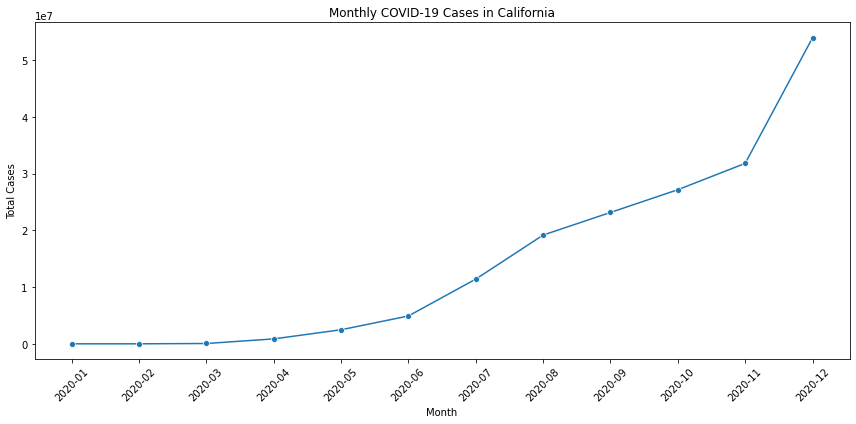

In [21]:
#importing seaborn for the visualization
import seaborn as sb

#Filter for California
california_df = df[df['state'] == 'California'].copy()

#Create a new column for 'year-month'
california_df['month'] = california_df['date'].dt.to_period('M')

# Group by month and sum cases
monthly_cases = california_df.groupby('month')['cases'].sum().reset_index()
monthly_cases['month'] = monthly_cases['month'].astype(str)  # Convert Period to str for plotting

#Plotting a line chart
plt.figure(figsize=(12, 6))
sb.lineplot(data=monthly_cases, x='month', y='cases', marker='o')
plt.title('Monthly COVID-19 Cases in California')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
